<a href="https://colab.research.google.com/github/aisyahaini/MachineLearning/blob/main/DeepLearning_Aisyah_Nuraini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

path ke dataset

In [ ]:
from google.colab import drive
drive.flush_and_unmount()

Drive not mounted, so nothing to flush and unmount.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/SEMESTER 4/Machine Learning/dataset sepatu'


In [ ]:
# Fungsi untuk memproses gambar
def process_image(image_path):
    img = Image.open(image_path)
    img = img.resize((28, 28))
    img = img.convert('L')
    img_array = np.array(img)
    img_array = img_array / 255.0
    return img_array

# Membaca semua gambar dan label dari subfolder
def load_dataset(dataset_path):
    images = []
    labels = []
    label_names = sorted(os.listdir(dataset_path))

    for label_index, label_name in enumerate(label_names):
        label_path = os.path.join(dataset_path, label_name)
        image_files = os.listdir(label_path)

        for image_file in image_files:
            image_path = os.path.join(label_path, image_file)
            img_array = process_image(image_path)
            images.append(img_array)
            labels.append(label_index)

    return np.array(images), np.array(labels), label_names

images, labels, label_names = load_dataset(dataset_path)

# Menambahkan dimensi untuk channel (karena grayscale)
images = np.expand_dims(images, -1)

# Membagi dataset menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Mengubah label menjadi one-hot encoding
num_classes = len(label_names)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (96, 28, 28, 1)
x_test shape: (24, 28, 28, 1)
y_train shape: (96, 11)
y_test shape: (24, 11)


model CNN

In [ ]:
def create_cnn_model(input_shape, num_classes):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_model = create_cnn_model(x_train.shape[1:], num_classes)
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

Model RNN

In [ ]:
def create_rnn_model(input_shape, num_classes):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Reshape((input_shape[0], input_shape[1]), input_shape=input_shape),
        tf.keras.layers.SimpleRNN(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

rnn_model = create_rnn_model(x_train.shape[1:], num_classes)
rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               20096     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 11)                1419      
                                                                 
Total params: 38027 (148.54 KB)
Trainable params: 38027 (148.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model LSTM

In [ ]:
def create_lstm_model(input_shape, num_classes):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Reshape((input_shape[0], input_shape[1]), input_shape=input_shape),
        tf.keras.layers.LSTM(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

lstm_model = create_lstm_model(x_train.shape[1:], num_classes)
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 28, 28)            0         
                                                                 
 lstm (LSTM)                 (None, 128)               80384     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 11)                1419      
                                                                 
Total params: 98315 (384.04 KB)
Trainable params: 98315 (384.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Melatih model CNN

In [ ]:
cnn_history = cnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
cnn_accuracy = cnn_model.evaluate(x_test, y_test)[1]
print(f"CNN Accuracy: {cnn_accuracy}")

Epoch 1/10
3/3 [==============================] - 1s 152ms/step - loss: 2.4031 - accuracy: 0.1146 - val_loss: 2.3759 - val_accuracy: 0.2917
Epoch 2/10
3/3 [==============================] - 0s 44ms/step - loss: 2.3445 - accuracy: 0.2083 - val_loss: 2.3490 - val_accuracy: 0.1667
Epoch 3/10
3/3 [==============================] - 0s 39ms/step - loss: 2.2956 - accuracy: 0.1875 - val_loss: 2.3034 - val_accuracy: 0.2083
Epoch 4/10
3/3 [==============================] - 0s 46ms/step - loss: 2.2182 - accuracy: 0.2188 - val_loss: 2.2549 - val_accuracy: 0.2083
Epoch 5/10
3/3 [==============================] - 0s 44ms/step - loss: 2.1246 - accuracy: 0.2708 - val_loss: 2.1600 - val_accuracy: 0.2500
Epoch 6/10
3/3 [==============================] - 0s 48ms/step - loss: 1.9910 - accuracy: 0.4062 - val_loss: 2.0322 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 0s 58ms/step - loss: 1.8253 - accuracy: 0.5104 - val_loss: 1.8551 - val_accuracy: 0.4583
Epoch 8/10
3/3 [==========

Melatih model RNN

In [ ]:
rnn_history = rnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
rnn_accuracy = rnn_model.evaluate(x_test, y_test)[1]
print(f"RNN Accuracy: {rnn_accuracy}")

Epoch 1/10
3/3 [==============================] - 2s 245ms/step - loss: 2.3932 - accuracy: 0.0938 - val_loss: 2.3808 - val_accuracy: 0.1667
Epoch 2/10
3/3 [==============================] - 0s 46ms/step - loss: 2.3354 - accuracy: 0.1458 - val_loss: 2.3455 - val_accuracy: 0.1667
Epoch 3/10
3/3 [==============================] - 0s 37ms/step - loss: 2.3181 - accuracy: 0.1562 - val_loss: 2.3258 - val_accuracy: 0.1667
Epoch 4/10
3/3 [==============================] - 0s 42ms/step - loss: 2.2855 - accuracy: 0.1562 - val_loss: 2.3275 - val_accuracy: 0.1667
Epoch 5/10
3/3 [==============================] - 0s 35ms/step - loss: 2.2559 - accuracy: 0.2292 - val_loss: 2.3181 - val_accuracy: 0.2083
Epoch 6/10
3/3 [==============================] - 0s 36ms/step - loss: 2.2187 - accuracy: 0.2396 - val_loss: 2.2822 - val_accuracy: 0.1667
Epoch 7/10
3/3 [==============================] - 0s 40ms/step - loss: 2.1739 - accuracy: 0.2708 - val_loss: 2.2797 - val_accuracy: 0.2083
Epoch 8/10
3/3 [==========

Melatih model LSTM

In [ ]:
lstm_history = lstm_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
lstm_accuracy = lstm_model.evaluate(x_test, y_test)[1]
print(f"LSTM Accuracy: {lstm_accuracy}")

Epoch 1/10
3/3 [==============================] - 2s 191ms/step - loss: 2.4166 - accuracy: 0.0729 - val_loss: 2.3646 - val_accuracy: 0.1667
Epoch 2/10
3/3 [==============================] - 0s 56ms/step - loss: 2.3651 - accuracy: 0.1458 - val_loss: 2.3589 - val_accuracy: 0.1667
Epoch 3/10
3/3 [==============================] - 0s 56ms/step - loss: 2.3467 - accuracy: 0.1458 - val_loss: 2.3660 - val_accuracy: 0.1667
Epoch 4/10
3/3 [==============================] - 0s 57ms/step - loss: 2.3330 - accuracy: 0.1458 - val_loss: 2.3860 - val_accuracy: 0.1667
Epoch 5/10
3/3 [==============================] - 0s 53ms/step - loss: 2.3052 - accuracy: 0.1979 - val_loss: 2.3843 - val_accuracy: 0.1667
Epoch 6/10
3/3 [==============================] - 0s 52ms/step - loss: 2.2804 - accuracy: 0.1979 - val_loss: 2.3627 - val_accuracy: 0.1667
Epoch 7/10
3/3 [==============================] - 0s 59ms/step - loss: 2.2143 - accuracy: 0.2083 - val_loss: 2.3928 - val_accuracy: 0.1667
Epoch 8/10
3/3 [==========

Membandingkan Akurasi CNN, RNN, LSTM

In [ ]:
print(f"CNN Accuracy: {cnn_accuracy}")
print(f"RNN Accuracy: {rnn_accuracy}")
print(f"LSTM Accuracy: {lstm_accuracy}")

CNN Accuracy: 0.4166666567325592
RNN Accuracy: 0.25
LSTM Accuracy: 0.1666666716337204


data augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.001,
    height_shift_range=0.001,
    shear_range=0.001,
    zoom_range=0.001,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

Mengubah Arsitektur Model

In [ ]:
#Model CNN yang Diperbaiki
def create_cnn_model(input_shape, num_classes):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


Menggunakan Callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

history = cnn_model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    validation_data=(x_test, y_test),
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
3/3 [==============================] - 1s 68ms/step - loss: 1.6328 - accuracy: 0.4271 - val_loss: 1.3577 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/50
3/3 [==============================] - 0s 40ms/step - loss: 1.5042 - accuracy: 0.4583 - val_loss: 1.4700 - val_accuracy: 0.4583 - lr: 0.0010
Epoch 3/50
3/3 [==============================] - 0s 44ms/step - loss: 1.5751 - accuracy: 0.4583 - val_loss: 1.3629 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/50
3/3 [==============================] - 0s 54ms/step - loss: 1.5195 - accuracy: 0.4583 - val_loss: 1.2458 - val_accuracy: 0.5417 - lr: 0.0010
Epoch 5/50
3/3 [==============================] - 0s 48ms/step - loss: 1.4065 - accuracy: 0.4583 - val_loss: 1.1944 - val_accuracy: 0.5417 - lr: 0.0010
Epoch 6/50
3/3 [==============================] - 0s 39ms/step - loss: 1.2235 - accuracy: 0.5729 - val_loss: 1.1229 - val_accuracy: 0.5417 - lr: 0.0010
Epoch 7/50
3/3 [==============================] - 0s 38ms/step - loss: 1.2623 - accuracy

Evaluasi Model CNN

In [ ]:
cnn_accuracy = cnn_model.evaluate(x_test, y_test)[1]
print(f"CNN Accuracy: {cnn_accuracy}")

1/1 [==============================] - 0s 28ms/step - loss: 0.9560 - accuracy: 0.6667
CNN Accuracy: 0.6666666865348816


Evaluasi model RNN

In [ ]:
def create_rnn_model(input_shape, num_classes):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Reshape((input_shape[0], input_shape[1]), input_shape=input_shape),
        tf.keras.layers.SimpleRNN(128, activation='relu', return_sequences=True),
        tf.keras.layers.SimpleRNN(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

rnn_model = create_rnn_model(x_train.shape[1:], num_classes)
rnn_model.summary()

rnn_history = rnn_model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    validation_data=(x_test, y_test),
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)

rnn_accuracy = rnn_model.evaluate(x_test, y_test)[1]
print(f"RNN Accuracy: {rnn_accuracy}")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 28, 28)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 28, 128)           20096     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 11)                1419      
                                                                 
Total params: 70923 (277.04 KB)
Trainable params: 7092

Evaluasi model LSTM

In [ ]:
def create_lstm_model(input_shape, num_classes):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Reshape((input_shape[0], input_shape[1]), input_shape=input_shape),
        tf.keras.layers.LSTM(128, activation='relu', return_sequences=True),
        tf.keras.layers.LSTM(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

lstm_model = create_lstm_model(x_train.shape[1:], num_classes)
lstm_model.summary()

lstm_history = lstm_model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    validation_data=(x_test, y_test),
    epochs=50,
    callbacks=[early_stopping, reduce_lr]
)

lstm_accuracy = lstm_model.evaluate(x_test, y_test)[1]
print(f"LSTM Accuracy: {lstm_accuracy}")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_3 (Reshape)         (None, 28, 28)            0         
                                                                 
 lstm_1 (LSTM)               (None, 28, 128)           80384     
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 11)                1419      
                                                                 
Total params: 229899 (898.04 KB)
Trainable params: 229

Memuat model setelah dilatih

In [ ]:
cnn_model.save('/content/drive/MyDrive/cnn_model.h5')
rnn_model.save('/content/drive/MyDrive/rnn_model.h5')
lstm_model.save('/content/drive/MyDrive/lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Fungsi untuk Memuat dan Mengklasifikasikan Gambar Baru

In [ ]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

# Fungsi untuk memproses gambar
def process_image_for_prediction(image_path):
    img = Image.open(image_path)
    img = img.resize((28, 28))
    img = img.convert('L')
    img_array = np.array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=-1)  # Menambahkan dimensi untuk channel
    img_array = np.expand_dims(img_array, axis=0)   # Menambahkan batch size
    return img_array

# Fungsi untuk memprediksi gambar baru menggunakan model yang telah dilatih
def predict_image(model_path, image_path, label_names):
    model = load_model(model_path)
    img_array = process_image_for_prediction(image_path)
    prediction = model.predict(img_array)
    predicted_label = label_names[np.argmax(prediction)]
    return predicted_label

# Contoh penggunaan fungsi prediksi
label_names = sorted(os.listdir(dataset_path))  # Nama-nama label
image_path = '/content/drive/MyDrive/SEMESTER 4/Machine Learning/dataset sepatu/ikfina/IMG-20240613-WA0074.jpg'  # Ganti dengan path gambar baru
model_path = '/content/drive/MyDrive/cnn_model.h5'  # Ganti dengan path model yang diinginkan

predicted_label = predict_image(model_path, image_path, label_names)
print(f"Predicted Label: {predicted_label}")


1/1 [==============================] - 0s 123ms/step
Predicted Label: ikfina


Mengimplementasikan Input Gambar di Google Colab

Saving IMG20240613113236.jpg to IMG20240613113236.jpg


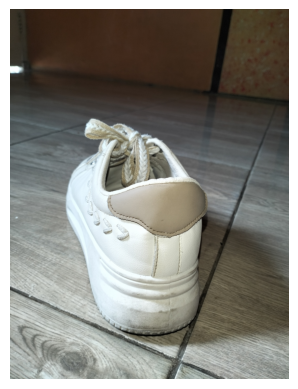

1/1 [==============================] - 0s 98ms/step
Predicted Label: aisyah putri


In [ ]:
from google.colab import files
import matplotlib.pyplot as plt

# Mengunggah file gambar
uploaded = files.upload()

# Memproses dan memprediksi gambar yang diunggah
for image_name in uploaded.keys():
    img_path = f"/content/{image_name}"
    plt.imshow(Image.open(img_path), cmap='gray')
    plt.axis('off')
    plt.show()

    predicted_label = predict_image(model_path, img_path, label_names)
    print(f"Predicted Label: {predicted_label}")